In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pickle
import os
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans
from importlib import reload

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../t-recs/')
from trecs.metrics import MSEMeasurement, InteractionSpread, InteractionSpread, InteractionSimilarity, RecSimilarity, RMSEMeasurement, InteractionMeasurement
from trecs.components import Users
import trecs.matrix_ops as mo
import src.globals as globals
import seaborn as sns

from wrapper.models.bubble import BubbleBurster
from src.utils import *
from src.plotting import plot_measurements 
from src.scoring_functions import cosine_sim, entropy, content_fairness
from wrapper.metrics.evaluation_metrics import *

random_state = np.random.seed(42)
plt.style.use("seaborn")

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

globals.initialize()

/var/folders/sm/hcy50x855gvf2b1qwkjstnvh0000gn/T/ipykernel_10038/2732531481.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [52]:
def plot_histograms(hist_df, measurement):
    # for every 10 timesteps plot line in different color
    fig= plt.figure(figsize=(5, 5))
    
    timesteps = hist_df.shape[0]
    elems = np.arange(hist_df.shape[1])
    for i in range(10, timesteps+1, 10):
        # print(i)
        # print('hist_df[i] =', hist_df[i])
        counts = hist_df.iloc[i]
        plt.plot(elems, sorted(counts), label=f't={i}')

    plt.title(measurement)
    if measurement == 'user MSE':
        x_label = 'user'
        y_label = 'MSE'
    else:
        x_label = 'item'
        y_label = 'interaction #'
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

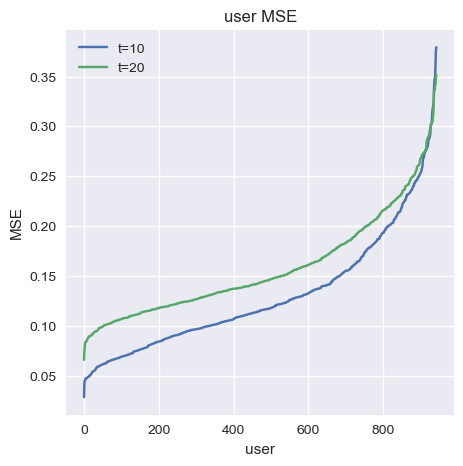

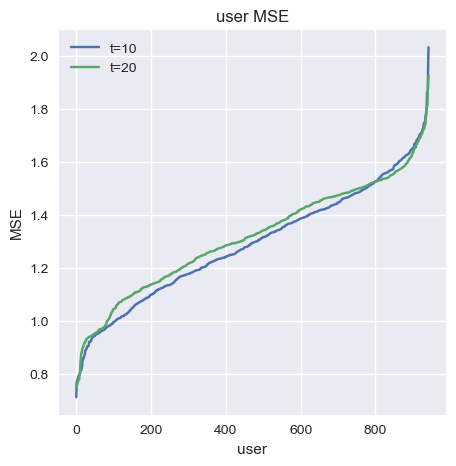

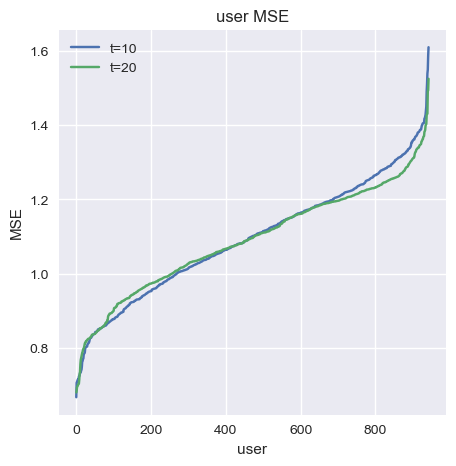

In [55]:
paths_user_mse = {
    'cosine_sim':'artefacts/supplementary/measurements/cosine_sim_user_mse_histogram_5trainTimesteps_20runTimesteps_20nAttrs_25nClusters_0.05Drift_-0.8AttentionExp_0.2Lambda.csv',
    'myopic':'artefacts/supplementary/measurements/myopic_user_mse_histogram_5trainTimesteps_20runTimesteps_20nAttrs_25nClusters_0.05Drift_-0.8AttentionExp.csv',
    'entropy':'artefacts/supplementary/measurements/entropy_user_mse_histogram_5trainTimesteps_20runTimesteps_20nAttrs_25nClusters_0.05Drift_-0.8AttentionExp_0.2Lambda.csv'
}

# fig, ax = plt.subplots(nrows=len(paths_user_mse), ncols=1)

models = list(paths_user_mse.keys())
for i in range(len(models)):
    user_mse = pd.read_csv(paths_user_mse[models[i]])
    
    if 'Unnamed: 0' in user_mse.columns:
        user_mse = user_mse.drop(columns='Unnamed: 0')
    
    # print(len(user_mse))
    # print(user_mse.shape)
    plot_histograms(user_mse, 'user MSE')
    # break
    